In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [4]:
def generate_model_report(actual_parameters, predicted_parameters):
    print("Accuracy score = {}".format(accuracy_score(actual_parameters,predicted_parameters)))
    print("F1 score = {}".format(f1_score(actual_parameters,predicted_parameters)))
    print("Recall score = {}".format(recall_score(actual_parameters,predicted_parameters)))
    print("Precision score = {}".format(precision_score(actual_parameters,predicted_parameters)))
    pass

In [5]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X=df.loc[:,df.columns!='Class']

In [8]:
Y=df.loc[:,df.columns=='Class']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

0    284315
1       492
Name: Class, dtype: int64


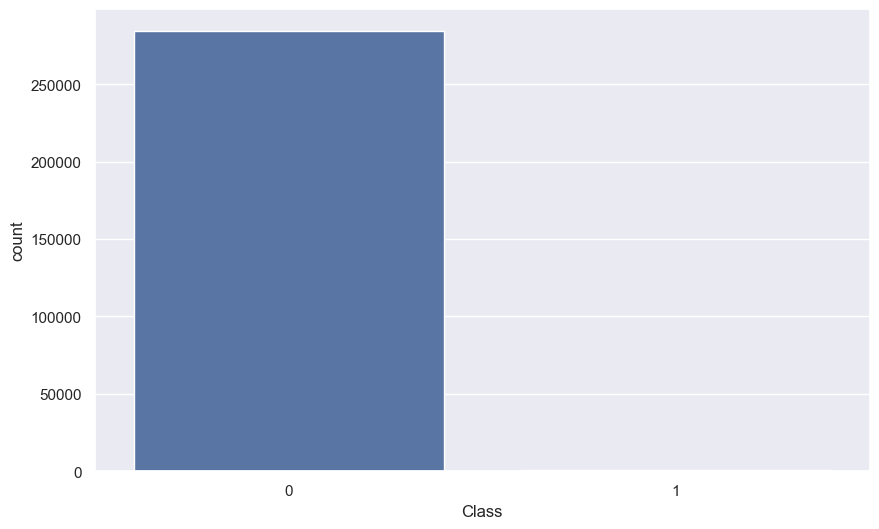

In [10]:
ax=sns.countplot(x='Class',data=df)
print(df['Class'].value_counts())

In [11]:
100* (492/float(df.shape[0]))

0.1727485630620034

In [12]:
100*(284315/float(df.shape[0]))

99.82725143693798

In [13]:
Y_train['Class'].value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [14]:
clf=LogisticRegression().fit(X_train, Y_train)

In [15]:
Y_Test_Pred = clf.predict(X_test)

In [16]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test['Class'], name = 'Actual'))

Actual,0,1
Predicted,,
0,25497,50
1,42,0


In [17]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy score = 0.9985955549313578
F1 score = 0.5588235294117647
Recall score = 0.5588235294117647
Precision score = 0.5588235294117647


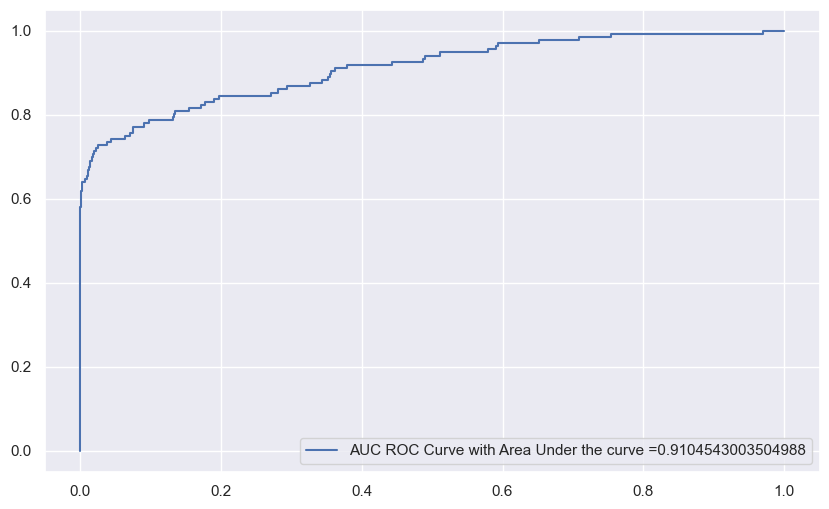

In [18]:
generate_auc_roc_curve(clf, X_test)

In [19]:
print (X_train.shape, Y_train.shape)

(199364, 30) (199364, 1)


## class_weight='balanced'

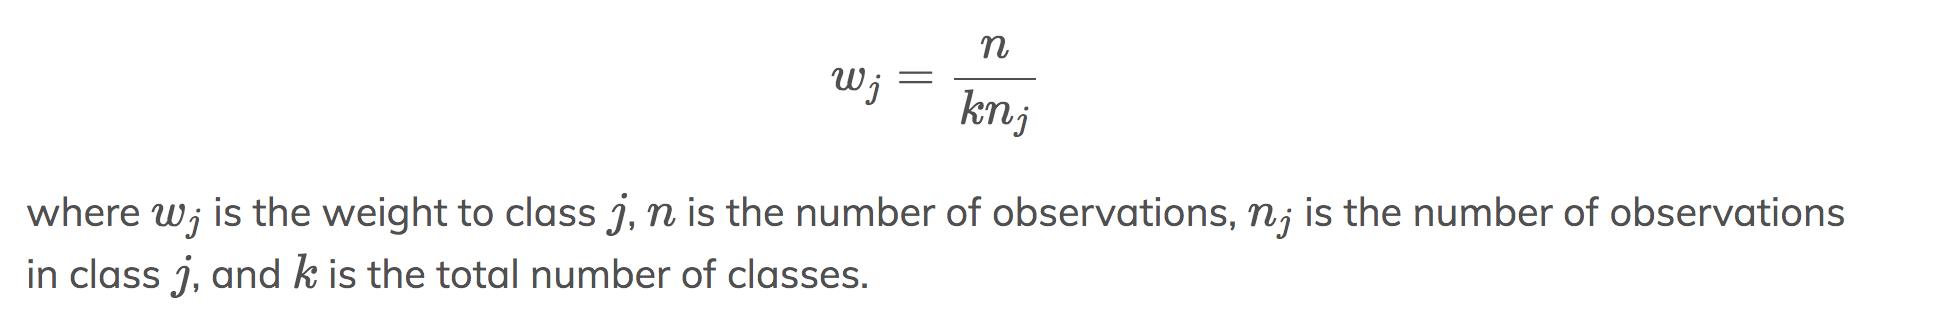

In [20]:
clf=LogisticRegression(class_weight='balanced').fit(X_train,Y_train)

In [21]:
Y_Test_Pred = clf.predict(X_test)

In [22]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test['Class'], name = 'Actual'))

Actual,0,1
Predicted,,
0,24521,49
1,1018,1


In [23]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy score = 0.9631099095303302
F1 score = 0.07348618459729571
Recall score = 0.9191176470588235
Precision score = 0.03827311696264544


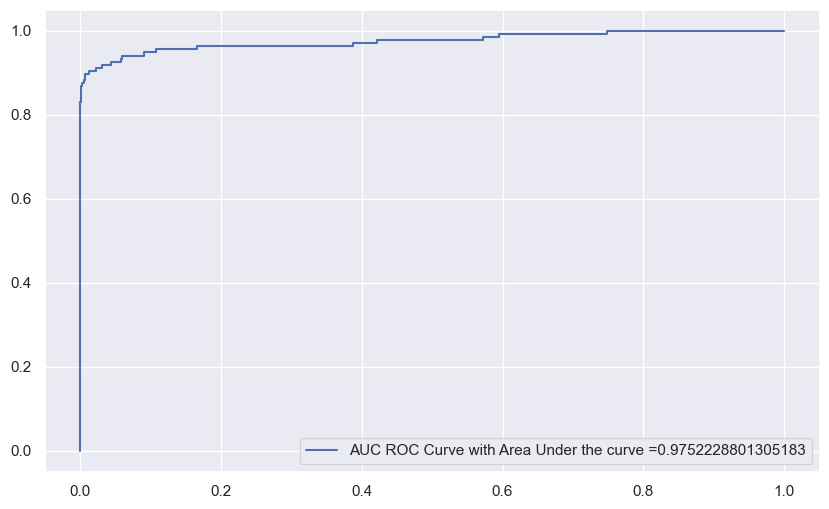

In [24]:
generate_auc_roc_curve(clf, X_test)

In [25]:
weights=np.linspace(0.05,0.95,20)
gsc=GridSearchCV(estimator=LogisticRegression(),
        param_grid={
            'class_weight':[{0:x,1:1-x} for x in weights]
        },
                 scoring='f1',
                 cv=5
                                  
)
grid_result=gsc.fit(X_train,Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.33421052631578946, 1: 0.6657894736842105}}


<AxesSubplot: xlabel='weight'>

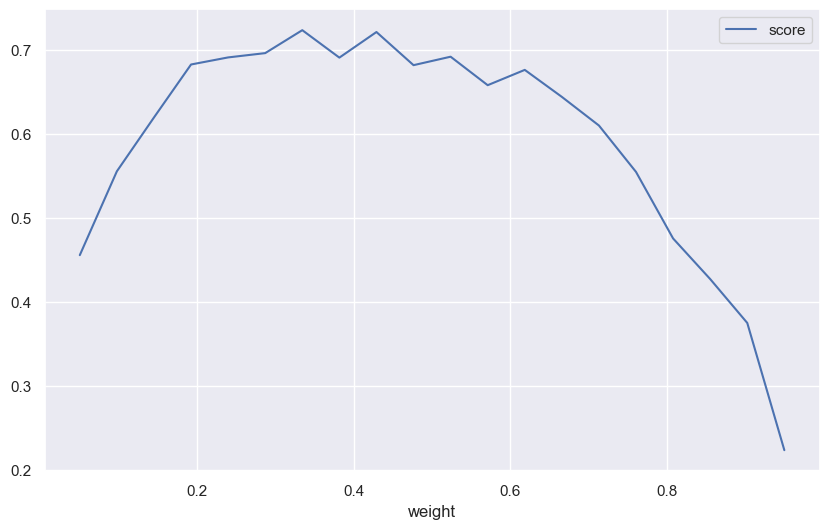

In [26]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [27]:
data_out

,score,weight
0,0.455782,0.050000
1,0.555559,0.097368
2,0.619585,0.144737
3,0.682620,0.192105
4,0.691039,0.239474
5,0.696151,0.286842
6,0.723454,0.334211
7,0.690792,0.381579
8,0.721255,0.428947
9,0.681818,0.476316


In [28]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [29]:
Y_Test_Pred = clf.predict(X_test)

In [30]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test['Class'], name = 'Actual'))

Actual,0,1
Predicted,,
0,25493,50
1,46,0


In [31]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy score = 0.9992392589211521
F1 score = 0.749034749034749
Recall score = 0.7132352941176471
Precision score = 0.7886178861788617


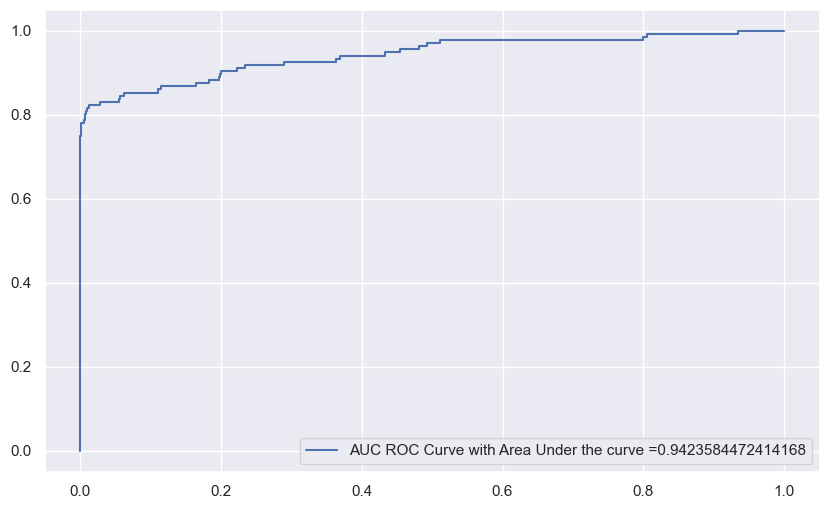

In [32]:
generate_auc_roc_curve(clf, X_test)

## SMOTE

In [33]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { a:b for (a,b) in zip(unique, count)}
Y_train_dict_value_count

{0: 199008, 1: 356}

In [34]:
sm = SMOTE(random_state=12, k_neighbors=5)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [35]:
unique, count=np.unique(y_train_res, return_counts=True)
y_train_res_dict_value_count = {a:b for(a,b) in zip(unique,count)}
y_train_res_dict_value_count

{0: 199008, 1: 199008}

In [36]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [37]:
Y_Test_Pred = clf.predict(X_test)

In [38]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test['Class'], name = 'Actual'))

Actual,0,1
Predicted,,
0,24966,50
1,573,0


In [39]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy score = 0.9801153985698068
F1 score = 0.12827090815802974
Recall score = 0.9191176470588235
Precision score = 0.06894649751792609


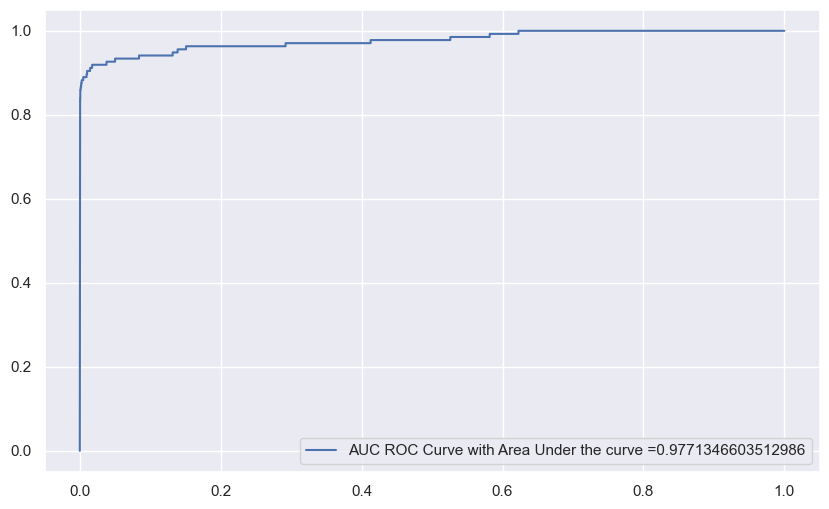

In [40]:
generate_auc_roc_curve(clf, X_test)

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
pipe = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gsc = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)




<IPython.core.display.Javascript object>